# test pyTorch

source : **Twitter-roBERTa-base for Sentiment Analysis**

sur [Hugging Face ](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment)

In [1]:
!pwd

/mnt/notebooks


In [2]:
import torch

In [3]:
!pip install transformers

In [4]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request


In [5]:

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []


    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)


In [6]:
# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

#task='sentiment'
#MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

In [64]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [67]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
from transformers import AutoTokenizer, AutoConfig
from transformers import pipeline

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
print(MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)


# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained('../pretrained_models/'+MODEL)
tokenizer.save_pretrained('../pretrained_models/'+MODEL)
config.save_pretrained('../pretrained_models/'+MODEL)

cardiffnlp/twitter-roberta-base-sentiment


In [62]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
sentence  = 'Hello World!'
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
model     = BertModel.from_pretrained('bert-large-uncased')

inputs    = tokenizer(sentence, return_tensors="pt").to(device)
model     = model.to(device)
outputs   = model(**inputs)

NameError: name 'BertTokenizer' is not defined

In [8]:
#model = AutoModelForSequenceClassification.from_pretrained(MODEL) 
#model.save_pretrained(MODEL)
#tokenizer.save_pretrained(MODEL)

In [9]:
#from transformers import AutoTokenizer, AutoConfig

#tokenizer = AutoTokenizer.from_pretrained(MODEL)
#config = AutoConfig.from_pretrained(MODEL)
#config.save_pretrained('YOURPATH')


In [10]:
#tokenizer.save_pretrained('YOURPATH')
#config.save_pretrained('YOURPATH')

#tokenizer = AutoTokenizer.from_pretrained('YOURPATH')

In [8]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [72]:
# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [77]:
nlp=pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0, return_all_scores=True)

In [82]:
text = "Good night 😊"
text = preprocess(text)

nlp(text, return_all_scores=True)

[[{'label': 'LABEL_0', 'score': 0.007609867490828037},
  {'label': 'LABEL_1', 'score': 0.1458120346069336},
  {'label': 'LABEL_2', 'score': 0.8465781211853027}]]

In [81]:
text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

RuntimeError: Input, output and indices must be on the current device

In [11]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) positive 0.8466
2) neutral 0.1458
3) negative 0.0076


# ==== RECUP ML ====

In [15]:
!pip install nltk


In [13]:
!pip install textblob


     |████████████████████████████████| 636 kB 17.1 MB/s eta 0:00:01


In [17]:
!pip install spacy

In [14]:
#Temps et fichiers
import os
import warnings
import time
from datetime import timedelta

#Manipulation de données
import pandas as pd
import numpy as np


# Text
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import string
import re
import spacy 


#Modélisation
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV# the keys can be accessed with final_pipeline.get_params().keys()
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier


#Evaluation
from sklearn.metrics import f1_score, confusion_matrix


#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


#Tracking d'expérience
import mlflow
import mlflow.sklearn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Utilisation du code du projet packagé

In [22]:
#Cette cellule permet d'appeler la version packagée du projet et d'en assurer le reload avant appel des fonctions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from dsa_sentiment.scripts.make_dataset import load_data

In [28]:
#from dsa_sentiment.scripts.evaluate import eval_metrics
from dsa_sentiment.scripts.evaluate import eval_metrics

In [29]:
from dsa_sentiment.scripts.make_dataset import Preprocess_StrLower, Preprocess_transform_target

### Configuration de l'experiment MLFlow

In [30]:
mlflow.tracking.get_tracking_uri()

'/mnt/experiments'

In [31]:
exp_name="DSA_sentiment_GPU"
mlflow.set_experiment(exp_name)

INFO: 'DSA_sentiment_GPU' does not exist. Creating a new experiment


### Chargement des données

In [32]:
data_folder = os.path.join('..', 'data', 'raw')
all_raw_files = [os.path.join(data_folder, fname)
                    for fname in os.listdir(data_folder)]
all_raw_files

['../data/raw/sample_submission.csv',
 '../data/raw/test.csv',
 '../data/raw/train.csv']

In [33]:
random_state=42

Il n'est pas possible de faire de l'imputation comme avec des champs numérique. Il convient donc de supprimer les entrées vides

In [34]:
X_train, y_train, X_val, y_val = load_data(all_raw_files[2], split=True, test_size=0.3, random_state=random_state, dropNA=True)

In [35]:
X_train.head()

,textID,text,selected_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD
2,088c60f138,my boss is bullying me...,bullying me
3,9642c003ef,what interview! leave me alone,leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,"


In [36]:
y_train.head()

,sentiment
0,neutral
1,negative
2,negative
3,negative
4,negative


In [37]:
X_train.shape[0] + X_val.shape[0]

27480

In [38]:
X_test, y_test = load_data(all_raw_files[1], split=False, random_state=random_state, dropNA=True)

In [39]:
X_test.head()

,textID,text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to..."
3,01082688c6,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!


In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textID  3534 non-null   object
 1   text    3534 non-null   object
dtypes: object(2)
memory usage: 55.3+ KB


In [41]:
y_test.head()

,sentiment
0,neutral
1,positive
2,negative
3,positive
4,positive


In [42]:
X_train = Preprocess_StrLower(X_train, columns_to_process=['text'])
X_train.head()

,textID,text,selected_text
0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going"
1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD
2,088c60f138,my boss is bullying me...,bullying me
3,9642c003ef,what interview! leave me alone,leave me alone
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,"


In [43]:
y_train = Preprocess_transform_target(y_train, columns_to_process=['sentiment'])
y_train.head()

,sentiment
0,0
1,-1
2,-1
3,-1
4,-1


In [44]:
y_val = Preprocess_transform_target(y_val, ['sentiment'])
y_val.head()

,sentiment
19236,0
19237,-1
19238,1
19239,-1
19240,1


In [45]:
X_test = Preprocess_StrLower(X_test, columns_to_process=['text'])
X_test.head()

,textID,text
0,f87dea47db,last session of the day http://twitpic.com/67ezh
1,96d74cb729,shanghai is also really exciting (precisely -...
2,eee518ae67,"recession hit veronique branquinho, she has to..."
3,01082688c6,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - i like it!!


In [46]:
y_test = Preprocess_transform_target(y_test, ['sentiment'])
y_test.head()

,sentiment
0,0
1,1
2,-1
3,1
4,1


# === ESSAI HUGGING FACE ===

In [47]:
X_train.head()

,textID,text,selected_text
0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going"
1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD
2,088c60f138,my boss is bullying me...,bullying me
3,9642c003ef,what interview! leave me alone,leave me alone
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,"


In [ ]:
# X_train_txt=X_train['text'].apply(lambda x : tokenizer(preprocess(x), return_tensors='pt'))

In [ ]:
# X_train_txt.head()

In [ ]:
# output = X_train_txt.apply(lambda x : model(**x))

In [ ]:
# output.describe()

In [140]:
def TorchTwitterRoBERTa_Pred(text = "Good night 😊"):
    text = preprocess(text)
    otpt = nlp(text)
    NewName = {0:'roBERTa-neg', 1:'roBERTa-neu', 2:'roBERTa-pos'}
    otpt = pd.json_normalize(otpt[0]).transpose().rename(columns=NewName).reset_index().drop([0]).drop(columns=['index'])
    return otpt

In [142]:
test = TorchTwitterRoBERTa_Pred()
test
#pd.json_normalize(dfb.Pollutants)

,roBERTa-neg,roBERTa-neu,roBERTa-pos
1,0.00761,0.145812,0.846578


In [137]:
NewName = {0:'roBERTa-neg', 1:'roBERTa-neu', 2:'roBERTa-pos'}

#pd.DataFrame(pd.json_normalize(test).transpose().rename(columns=NewName).loc['score']).transpose()
pd.json_normalize(test).transpose().rename(columns=NewName).reset_index().drop([0]).drop(columns=['index'])
#.rename(columns=['roBERTa-neg', 'roBERTa-neu', 'roBERTa-pos'])

,roBERTa-neg,roBERTa-neu,roBERTa-pos
1,0.00761,0.145812,0.846578


In [ ]:
test2

In [ ]:
test= X_train.head()['text'].apply(lambda x : TorchTwitterRoBERTa_Pred(x))
pd.DataFrame(test).apply(pd.Series.explode)

In [51]:
y_train.head()

,sentiment
0,0
1,-1
2,-1
3,-1
4,-1


In [52]:
TorchTwitterRoBERTa_Pred(X_test['text'][1])

array([0.00118703, 0.0127858 , 0.9860271 ], dtype=float32)

In [53]:
TorchTwitterRoBERTa_Pred()

array([0.00760987, 0.14581203, 0.8465782 ], dtype=float32)

In [54]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) positive 0.8466
2) neutral 0.1458
3) negative 0.0076


In [55]:
class clTwitterroBERTa(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X[['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos']] =  X[self.field].apply(lambda x : TorchTwitterRoBERTa_Pred(x)).apply(pd.Series)
        
        #self.res[['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos']] =  X[self.field].apply(lambda x : TorchTwitterRoBERTa_Pred(x)).apply(pd.Series)
        return X[['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos']]
        #return self.res

In [56]:
24

24

In [57]:
np.vectorize(TorchTwitterRoBERTa_Pred)(X_train['text'][0:5])

ValueError: setting an array element with a sequence.

In [58]:
roBERTa_pipe=Pipeline([
                     ('roBERTa', clTwitterroBERTa(field='text'))
                    ])

In [59]:
essai=roBERTa_pipe.transform(X_train.head())
essai.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,0.064988,0.805913,0.129099
1,0.917538,0.067550,0.014911
2,0.924613,0.070741,0.004646
3,0.783082,0.192980,0.023938
4,0.770765,0.212678,0.016557


In [60]:
essai=roBERTa_pipe.transform(X_train)

KeyboardInterrupt: 

In [61]:
import torch
torch.cuda.is_available()

True

In [136]:
essai.tail()

,roBERTa_neg,roBERTa_neu,roBERTa_pos
19231,0.001322,0.021538,0.977140
19232,0.019524,0.321748,0.658728
19233,0.016745,0.646879,0.336376
19234,0.738128,0.234858,0.027013
19235,0.505228,0.461052,0.033720


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

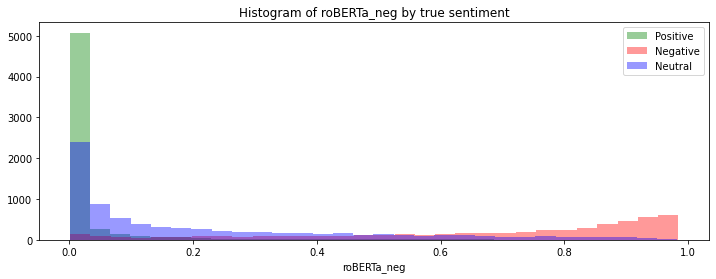

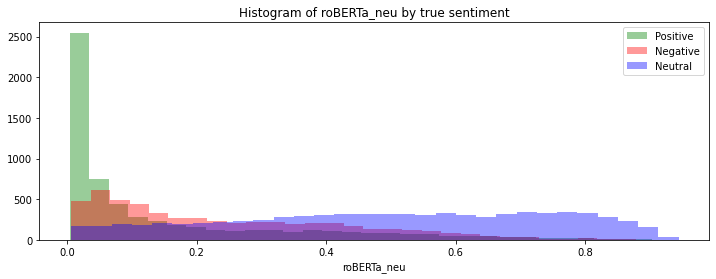

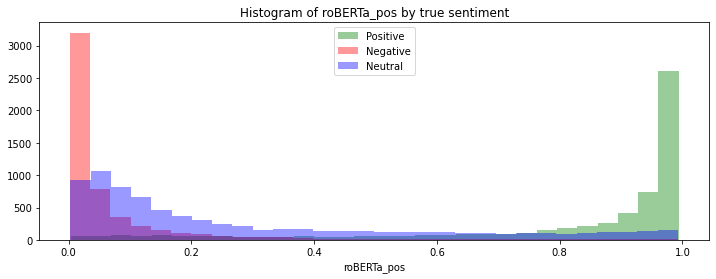

In [138]:
for var in ['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos']:
    plt.figure(figsize=(12,4))
    sns.distplot(essai[(y_train==1)['sentiment']][var], bins=30, kde=False, 
                 color='green', label='Positive')
    sns.distplot(essai[(y_train==-1)['sentiment']][var], bins=30, kde=False, 
                 color='red', label='Negative')
    sns.distplot(essai[(y_train==0)['sentiment']][var], bins=30, kde=False, 
                 color='blue', label='Neutral')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment');

## 1) Model

On commence par définir une fonction générique qui sera en capacité d'ajuster, optimiser et logger dans MLFlow les résultats de pipelines qui seront produits pour chaque essai

In [271]:
def trainPipelineMlFlow(xpName, pipeline, X_train, y_train, X_test, y_test, fixed_params={}, opti=False, iterable_params={}):
    """
    Fonction générique permettant d'entrainer et d'optimiser un pipeline sklearn
    Les paramètres et résultats sont stockés dans MLFlow
    """
  
    with mlflow.start_run(run_name=xpName):
        
        start_time = time.monotonic()  
        
        warnings.filterwarnings("ignore")
        
        # fit pipeline
        pipeline.set_params(**fixed_params)
        if not opti:
            search = pipeline
        else:
            search = RandomizedSearchCV(pipeline, iterable_params)
        search.fit(X_train, y_train)
                
        # get params
        # params_to_log = pipeline.get_params() #select initial params PB : can lead to greater than 250 charac limit
        params_to_log = fixed_params #select initial params
        if opti:
            params_to_log.update(search.best_params_) #update for optimal solution
        mlflow.log_params(params_to_log)
        
        
        # Evaluate metrics
        y_pred=search.predict(X_test)
        (f1_test, cr_test) = eval_metrics(y_test, y_pred)
        
        # Print out metrics
        print(xpName)
        print("  f1_test: %s" % f1_test)
        print("  CR_test: %s" % cr_test)

        mlflow.log_metrics({"f1_test": f1_test})
        mlflow.sklearn.log_model(pipeline, xpName)
        
        end_time = time.monotonic()
        elapsed_time = timedelta(seconds=end_time - start_time)
        print('elapsed time :', elapsed_time)
        mlflow.set_tag(key="elapsed_time", value=elapsed_time)   
        

In [272]:
def random_state_params(pipe, seed):
    """Crée un dictionnaire constitué de tous les paramètres 'random_state' d'un pipe et leur assigne une valeur unique"""
    rs = re.findall(r"[a-zA-Z\_]+_random_state", ' '.join(list(pipe.get_params().keys())))
    rs=dict.fromkeys(rs, seed)
    return rs

La cellule suivante permet de créer des étapes de sélection de colonnes dans les Data Frame en entrée

In [141]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]

class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.field]]

In [142]:
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [143]:
# Create function so that we could reuse later
def plot_cm(y_test, y_pred, target_names=[-1, 0, 1], 
            figsize=(5,3)):
    """Create a labelled confusion matrix plot."""
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', cbar=False, 
                ax=ax)
    ax.set_title('Confusion matrix')
    ax.set_xlabel('Predicted')
    ax.set_xticklabels(target_names)
    ax.set_ylabel('Actual')
    ax.set_yticklabels(target_names, 
                       fontdict={'verticalalignment': 'center'});

## roBERTa RF

In [144]:
roBERTa_RF_pipeline = Pipeline(
    steps=[
        ('roBERTa', clTwitterroBERTa(field='text')),
        ("classifier", RandomForestClassifier(n_jobs=-1))
    ]
)


In [273]:
roBERTa_RF_Pipe = Pipeline(
    steps=[
        ('roBERTa', roBERTa_pipe),
        ("classifier", RandomForestClassifier(n_jobs=-1))
    ]
)


In [274]:
random_state_params(roBERTa_RF_Pipe, random_state)

{'classifier__random_state': 42}

In [275]:
trainPipelineMlFlow(xpName="roBERTa - RF", 
                    pipeline=roBERTa_RF_Pipe, 
                    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
                    fixed_params=random_state_params(roBERTa_RF_Pipe, random_state))

KeyboardInterrupt: 

In [154]:
y_train_pred_roBERTa_RF = roBERTa_RF_Pipe.predict(X_train)
y_test_pred_roBERTa_RF = roBERTa_RF_Pipe.predict(X_test)

In [157]:
X_train_roBERTa= roBERTa_pipe.transform(X_train)

In [330]:
X_test_roBERTa= roBERTa_pipe.transform(X_test)

In [160]:
X_train_roBERTa.to_pickle('/mnt/data/interim/X_train_roBERTa.plk')
X_test_roBERTa.to_pickle('/mnt/data/interim/X_test_roBERTa.plk')

In [331]:
X_test_roBERTa.head(10)

,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,0.041864,0.867173,0.090963
1,0.001187,0.012786,0.986027
2,0.920724,0.073319,0.005957
3,0.002410,0.013607,0.983983
4,0.003263,0.027338,0.969399
5,0.001562,0.007538,0.990900
6,0.909208,0.078257,0.012535
7,0.857621,0.127331,0.015048
8,0.203005,0.742505,0.054490
9,0.005365,0.151973,0.842662


In [304]:
y_test.head()

,sentiment
0,0
1,1
2,-1
3,1
4,1


In [332]:
X_test_roBERTa.to_pickle('/mnt/data/interim/X_test_roBERTa.plk')

In [177]:
pd.DataFrame(y_train_pred_roBERTa_RF).to_pickle('/mnt/data/interim/y_train_pred_roBERTa_RF.plk')
pd.DataFrame(y_test_pred_roBERTa_RF).to_pickle('/mnt/data/interim/y_test_pred_roBERTa_RF.plk')


In [321]:
X_train_roBERTa[0:10]

NameError: name 'X_train_roBERTa' is not defined

In [170]:
y_train_score_roBERTa_RF=pd.DataFrame(roBERTa_RF_pipeline['classifier'].predict_proba(X_train_roBERTa_RF), columns=['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos'])

In [172]:
y_train_score_roBERTa_RF.tail()

,roBERTa_neg,roBERTa_neu,roBERTa_pos
19231,0.00,0.00,1.00
19232,0.13,0.17,0.70
19233,0.00,0.99,0.01
19234,0.20,0.80,0.00
19235,0.25,0.75,0.00


In [333]:
y_test_score_roBERTa_RF=pd.DataFrame(roBERTa_RF_pipeline['classifier'].predict_proba(X_test_roBERTa), columns=['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos'])

In [176]:
y_train_score_roBERTa_RF.to_pickle('/mnt/data/interim/y_train_score_roBERTa_RF.plk')


In [334]:
y_test_score_roBERTa_RF.to_pickle('/mnt/data/interim/y_test_score_roBERTa_RF.plk')

In [335]:
y_test_pred_roBERTa_RF=pd.DataFrame(roBERTa_RF_pipeline['classifier'].predict(X_test_roBERTa))

In [336]:
y_test_pred_roBERTa_RF.head()

,0
0,0
1,1
2,-1
3,1
4,1


In [320]:
 y_test_pred_roBERTa_RF[0]

0    0
1    1
2   -1
3    1
4    1
Name: 0, dtype: int64

In [316]:
y_test.head()

,sentiment
0,0
1,1
2,-1
3,1
4,1


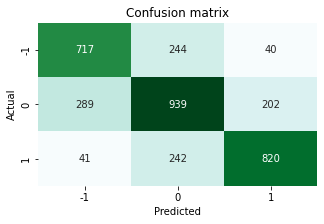

In [337]:
plot_cm(y_test['sentiment'], y_test_pred_roBERTa_RF[0])

In [338]:
(f1_test, cr_test) = eval_metrics(y_test['sentiment'], y_test_pred_roBERTa_RF[0])

In [339]:
f1_test

0.705164810393604

In [341]:
print(cr_test)

              precision    recall  f1-score   support

          -1       0.68      0.72      0.70      1001
           0       0.66      0.66      0.66      1430
           1       0.77      0.74      0.76      1103

    accuracy                           0.70      3534
   macro avg       0.71      0.71      0.71      3534
weighted avg       0.70      0.70      0.70      3534



In [178]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

In [241]:
X_test.head()

,textID,text,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,f87dea47db,last session of the day http://twitpic.com/67ezh,0.064988,0.805913,0.129099
1,96d74cb729,shanghai is also really exciting (precisely -...,0.917538,0.067550,0.014911
2,eee518ae67,"recession hit veronique branquinho, she has to...",0.924613,0.070741,0.004646
3,01082688c6,happy bday!,0.783082,0.192980,0.023938
4,33987a8ee5,http://twitpic.com/4w75p - i like it!!,0.770765,0.212678,0.016557


In [180]:
y_test.head()

,sentiment
0,0
1,1
2,-1
3,1
4,1


In [242]:
TorchTwitterRoBERTa_Pred(X_test['text'][1])

array([0.00118703, 0.01278579, 0.9860271 ], dtype=float32)

In [243]:
X_test_roBERTa_RF.head()

,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,0.064988,0.805913,0.129099
1,0.917538,0.067550,0.014911
2,0.924613,0.070741,0.004646
3,0.783082,0.192980,0.023938
4,0.770765,0.212678,0.016557


In [248]:
test= X_test['text'][0:5].apply(lambda x : TorchTwitterRoBERTa_Pred(x))
test

0        [0.04186411, 0.8671732, 0.09096259]
1    [0.0011870284, 0.0127857905, 0.9860271]
2       [0.9207242, 0.07331903, 0.005956579]
3     [0.0024100505, 0.013606693, 0.9839832]
4      [0.003262817, 0.027337728, 0.9693994]
Name: text, dtype: object

In [256]:
roBERTa_pipe.transform(X_test.head())

,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,0.041864,0.867173,0.090963
1,0.001187,0.012786,0.986027
2,0.920724,0.073319,0.005957
3,0.002410,0.013607,0.983983
4,0.003263,0.027338,0.969399


In [258]:
roBERTa_RF_Pipe['roBERTa'].transform(X_test.head())

,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,0.041864,0.867173,0.090963
1,0.001187,0.012786,0.986027
2,0.920724,0.073319,0.005957
3,0.002410,0.013607,0.983983
4,0.003263,0.027338,0.969399


In [255]:
roBERTa_RF_pipeline['roBERTa'].transform(X_test.head())

KeyboardInterrupt: 

In [181]:
y_test_score_roBERTa_RF.head()

,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,0.00,1.00,0.0
1,0.89,0.11,0.0
2,0.97,0.03,0.0
3,0.96,0.04,0.0
4,0.91,0.09,0.0


In [227]:
pd.DataFrame(roBERTa_RF_pipeline['classifier'].predict(X_test_roBERTa_RF)).head()

,0
0,0
1,-1
2,-1
3,-1
4,-1


In [228]:
X_test.head()

,textID,text,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,f87dea47db,last session of the day http://twitpic.com/67ezh,0.064988,0.805913,0.129099
1,96d74cb729,shanghai is also really exciting (precisely -...,0.917538,0.067550,0.014911
2,eee518ae67,"recession hit veronique branquinho, she has to...",0.924613,0.070741,0.004646
3,01082688c6,happy bday!,0.783082,0.192980,0.023938
4,33987a8ee5,http://twitpic.com/4w75p - i like it!!,0.770765,0.212678,0.016557


In [232]:
roBERTa_RF_pipeline['roBERTa'].transform(X_test.head())

KeyboardInterrupt: 

In [183]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [207]:
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

In [189]:
y_test_bi = label_binarize(y_test['sentiment'], classes=[-1, 0, 1])
n_classes = y_test_bi.shape[1]

In [188]:
y_test.head()

,sentiment
0,0
1,1
2,-1
3,1
4,1


In [190]:
y_test_bi[0:5]

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [192]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_test_score_roBERTa_RF[['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos'][i]])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [214]:
y_test_score_roBERTa_RF.to_numpy().shape

(3534, 3)

In [204]:
y_test_score_roBERTa_RF.to_numpy().ravel().shape

(10602,)

In [213]:
y_test.to_numpy().ravel().shape

(3534,)

In [222]:
test=pd.DataFrame(roBERTa_RF_pipeline['classifier'].predict_proba(X_test_roBERTa_RF), columns=['roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos'])

In [223]:
test.head()

,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,0.00,1.00,0.0
1,0.89,0.11,0.0
2,0.97,0.03,0.0
3,0.96,0.04,0.0
4,0.91,0.09,0.0


In [224]:
X_test_roBERTa_RF.head()

,roBERTa_neg,roBERTa_neu,roBERTa_pos
0,0.064988,0.805913,0.129099
1,0.917538,0.067550,0.014911
2,0.924613,0.070741,0.004646
3,0.783082,0.192980,0.023938
4,0.770765,0.212678,0.016557


In [216]:

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.where(abs(y_test_bi.ravel())>0.5,1,0), y_test_score_roBERTa_RF.to_numpy().ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

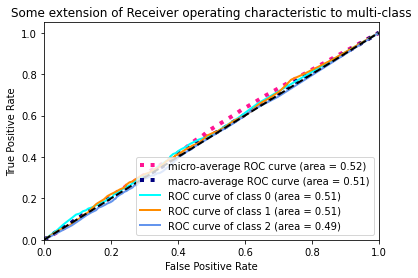

In [218]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure()
lw = 2

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [221]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 7.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [220]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=["win", "loss", "draw"])


ModuleNotFoundError: No module named 'yellowbrick'

In [179]:
fpr, tpr, thresholds = roc_curve(y_test['sentiment'], y_test_score_roBERTa_RF)

ValueError: multiclass format is not supported

# fin